Import the required libraries like numpy, panda and matplotlis for statistical anlysis and visal representation. 

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading data from the remote link 

In [3]:
student_data=pd.read_csv('http://bit.ly/w-data')
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Analysis of the data

In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Shape and function is used to know the number of rows and columns in the data set. 

In [ ]:
student_data.shape
(25,2)

Plot the data point to see if there is relation between rows and coloums in data set

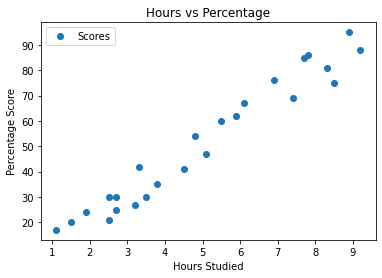

In [7]:
#plottig the distribution 
student_data.plot(x='Hours', y='Scores' , style='o')
plt.title ('Hours vs Percentage')
plt.xlabel ('Hours Studied')
plt.ylabel ('Percentage Score')
plt.show()

From the scattered plot, we can conclude there is a positive relation between 'Hours Studied' and 'Percentage score'
Now we will plot regression line for this correlation.
We also split the data into traning and test sets. 

In [9]:
from sklearn.model_selection import train_test_split
X = student_data.iloc[:, :-1].values
Y = student_data.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


We train the model and then fit it on the data set

In [11]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting Regression Line for the test set


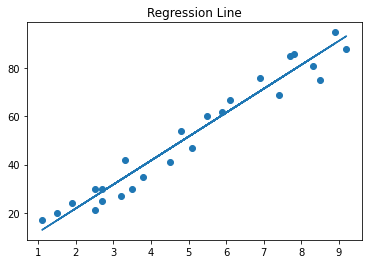

In [14]:
# Plotting the regression line
line = lin_model.coef_*X + lin_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.title( 'Regression Line') 
plt.plot(X, line);
plt.show()

Making Predictions 

In [15]:
print(X_test)
Y_test_predict = lin_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


Comparing actual vs predicton

In [17]:
df1 = pd.DataFrame({'ACTUAL':Y_test, 'PREDICTED' :Y_test_predict})
df1

,ACTUAL,PREDICTED
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Evaluating the model


In [19]:
#for training data
from sklearn.metrics import mean_absolute_error

#for testing data
mae = mean_absolute_error(Y_test, Y_test_predict)

print("Mean absolute error: ")
print('mea is {}'.format(mae))

Mean absolute error: 
mea is 4.130879918502482


Now that the estimated error is 4.1408. The chances of error through the model are low. 

Text(0, 0.5, 'Predict')

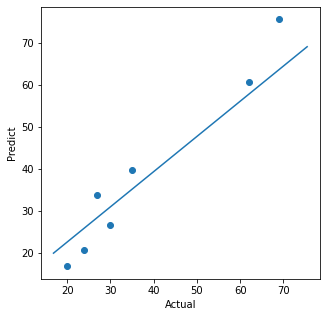

In [20]:
plt.figure(figsize= (5,5))
plt.scatter(Y_test,Y_test_predict)
plt.plot([min (Y_test_predict),max(Y_test_predict)], [min(Y_test),max(Y_test)])
plt.xlabel('Actual')
plt.ylabel('Predict')

We then will predict the score of the student who studied for **9.25 hours/day**

In [21]:
#solution
predicted_score = lin_model.predict([[9.25]])
print ('The predicted score for 9.25 study hours is' ,predicted_score)

The predicted score for 9.25 study hours is [93.89272889]


The following prediction concludes, those student who study for **9.25 hours per day**, they are likely to **score 93.89%**